In [1]:
from autism_data.arff_read import arff_to_df
from autism_data.arff_read import df_get_uniform_dummies
from ml_tools.scoring import log_loss

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
plt.style.use('seaborn-notebook')

%matplotlib inline

# 1) Import the data from UCI website and extract file from zip folder 

In [2]:
df = arff_to_df()
df_adult = arff_to_df("https://archive.ics.uci.edu/ml/machine-learning-databases/00426/Autism-Adult-Data%20Plus%20Description%20File.zip",'Autism-Adult-Data.arff')
df_adolescent = arff_to_df('https://archive.ics.uci.edu/ml/machine-learning-databases/00420/Autism-Adolescent-Data%20Plus%20Description.zip','Autism-Adolescent-Data.arff')
df_child = arff_to_df('https://archive.ics.uci.edu/ml/machine-learning-databases/00419/Autism-Child-Data%20Plus%20Description.zip','Autism-Child-Data.arff')

# 2) Data Preprocessing to identify the missing values

In [3]:
df = df.append([df_adult, df_adolescent, df_child])
df.isnull().sum() 
## There are no missing values - however, I will check if there are any values that aren't missing 
##the age range don't  make sense.

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
autism             0
used_app_before    0
result             0
age_range          0
relation           0
Class/ASD          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 291
Data columns (total 20 columns):
A1_Score           1392 non-null category
A2_Score           1392 non-null category
A3_Score           1392 non-null category
A4_Score           1392 non-null category
A5_Score           1392 non-null category
A6_Score           1392 non-null category
A7_Score           1392 non-null category
A8_Score           1392 non-null category
A9_Score           1392 non-null category
A10_Score          1392 non-null category
age                1392 non-null float64
gender             1392 non-null category
ethnicity          1392 non-null object
jaundice           1392 non-null int64
autism             1392 non-null int64
used_app_before    1392 non-null int64
result             1392 non-null float64
age_range          1392 non-null object
relation           1392 non-null category
Class/ASD          1392 non-null int64
dtypes: category(12), float64(2), int64(4), object(2)
memory usage: 115.

# 3) Exploring the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 291
Data columns (total 20 columns):
A1_Score           1392 non-null category
A2_Score           1392 non-null category
A3_Score           1392 non-null category
A4_Score           1392 non-null category
A5_Score           1392 non-null category
A6_Score           1392 non-null category
A7_Score           1392 non-null category
A8_Score           1392 non-null category
A9_Score           1392 non-null category
A10_Score          1392 non-null category
age                1392 non-null float64
gender             1392 non-null category
ethnicity          1392 non-null object
jaundice           1392 non-null int64
autism             1392 non-null int64
used_app_before    1392 non-null int64
result             1392 non-null float64
age_range          1392 non-null object
relation           1392 non-null category
Class/ASD          1392 non-null int64
dtypes: category(12), float64(2), int64(4), object(2)
memory usage: 115.

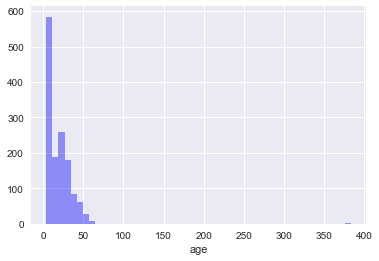

In [6]:
plot = sb.distplot(df.age, kde = False, color = "b")

## The age range is very wide and the age over 200 does not make sense.

In [7]:
df.age_filtered = df.age[(abs(np.array(df.age).astype(np.float) - np.mean(np.array(df.age).astype(np.float)))) < (10 * np.std(np.array(df.age).astype(np.float)))]

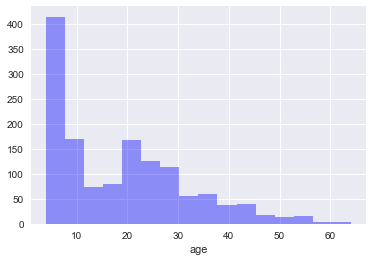

In [8]:
plot = sb.distplot(df.age_filtered, kde = False, color = "b")

## The age dataset has been filtered.

In [9]:
df.result.value_counts()

4.0     207
5.0     170
6.0     166
8.0     165
7.0     162
3.0     157
9.0     130
2.0      94
10.0     77
1.0      48
0.0      16
Name: result, dtype: int64

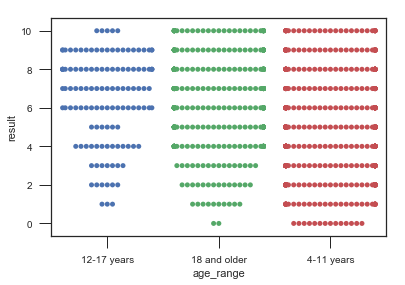

In [10]:
sb.set_style("whitegrid")
sb.set_style("ticks",{"xtick.major.size":12,"ytick.major.size":12})
sb.axes_style("whitegrid")

df['age_range'] = pd.cut(df.age,[min(df.age_filtered),11,17,max(df.age_filtered)],labels=['18 and older','12-17 years','4-11 years'],right=True)
sb.swarmplot(x='age_range',y='result',data=df)
plt.show() 

In [11]:
df.ethnicity.value_counts()

White-European    489
Asian             231
Unknown           187
Middle_Eastern    155
South_Asian        81
Black              79
Others             71
Latino             41
Hispanic           32
Pasifika           16
Turkish            10
Name: ethnicity, dtype: int64

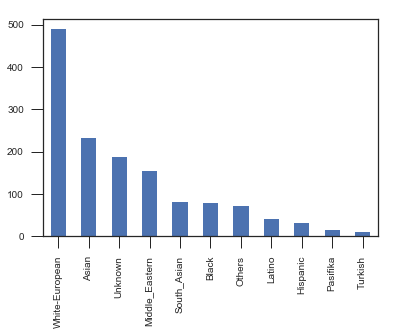

In [12]:
sb.set_style("whitegrid")
sb.set_style("ticks",{"xtick.major.size":12,"ytick.major.size":12})
sb.axes_style("whitegrid")

df.ethnicity.value_counts().plot(kind='bar')
plt.show()

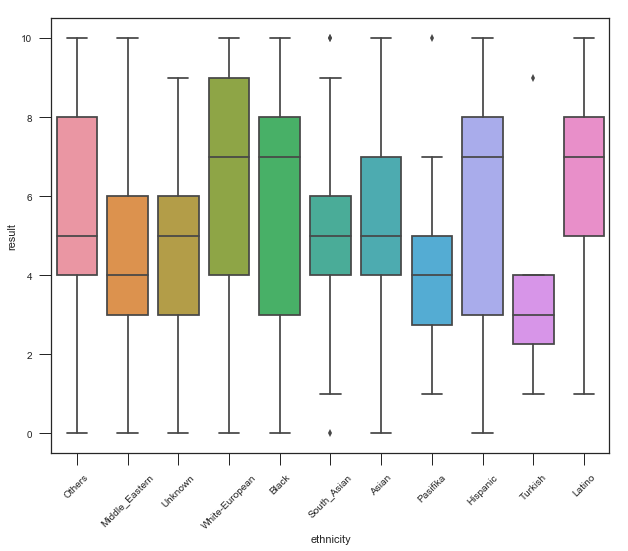

In [13]:
sb.set_style("whitegrid")
sb.set_style("ticks",{"xtick.major.size":12,"ytick.major.size":12})
sb.axes_style("whitegrid")

plt.figure(figsize=(10,8))
sb.boxplot(x='ethnicity',y='result',data=df)
plt.xticks(rotation=45)
plt.show()

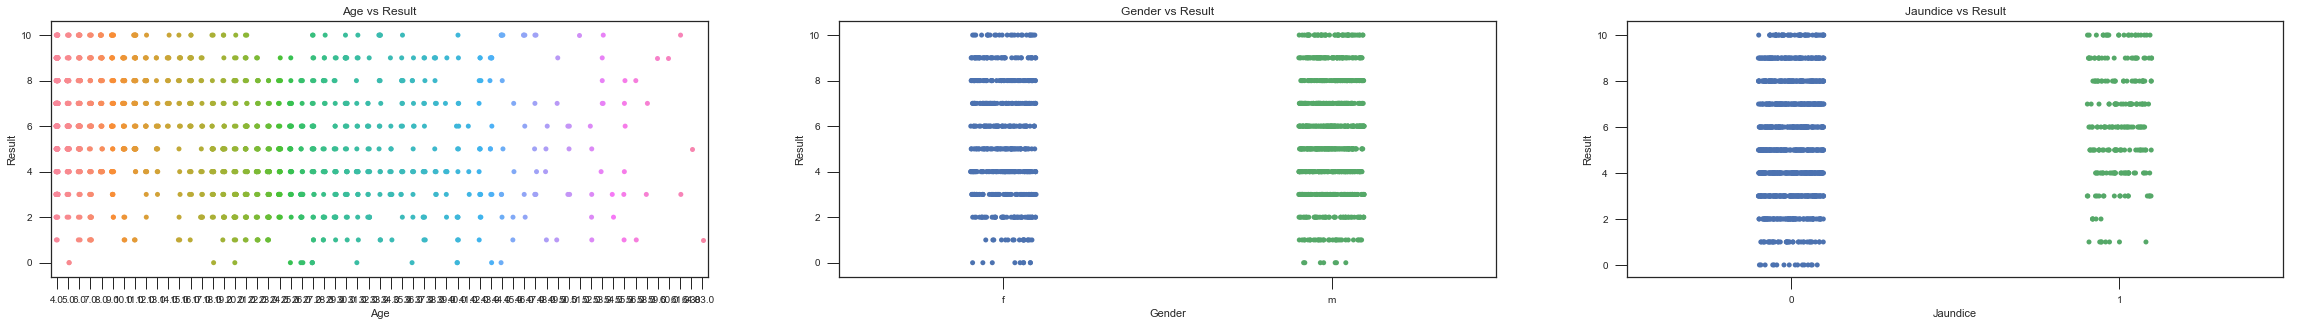

In [14]:
fig = plt.figure(figsize=(40,16))

ax1 = fig.add_subplot(331)
a1 = sb.stripplot(df.age,df.result, jitter=True)
plt.xlabel('Age')
plt.ylabel('Result')
plt.title('Age vs Result')

ax2 = fig.add_subplot(332)
a2 = sb.stripplot(df.gender,df.result, jitter=True)
plt.xlabel('Gender')
plt.ylabel('Result')
plt.title('Gender vs Result')

ax3 = fig.add_subplot(333)
a3 = sb.stripplot(df.jaundice,df.result, jitter=True)
plt.xlabel('Jaundice')
plt.ylabel('Result')
plt.title('Jaundice vs Result')

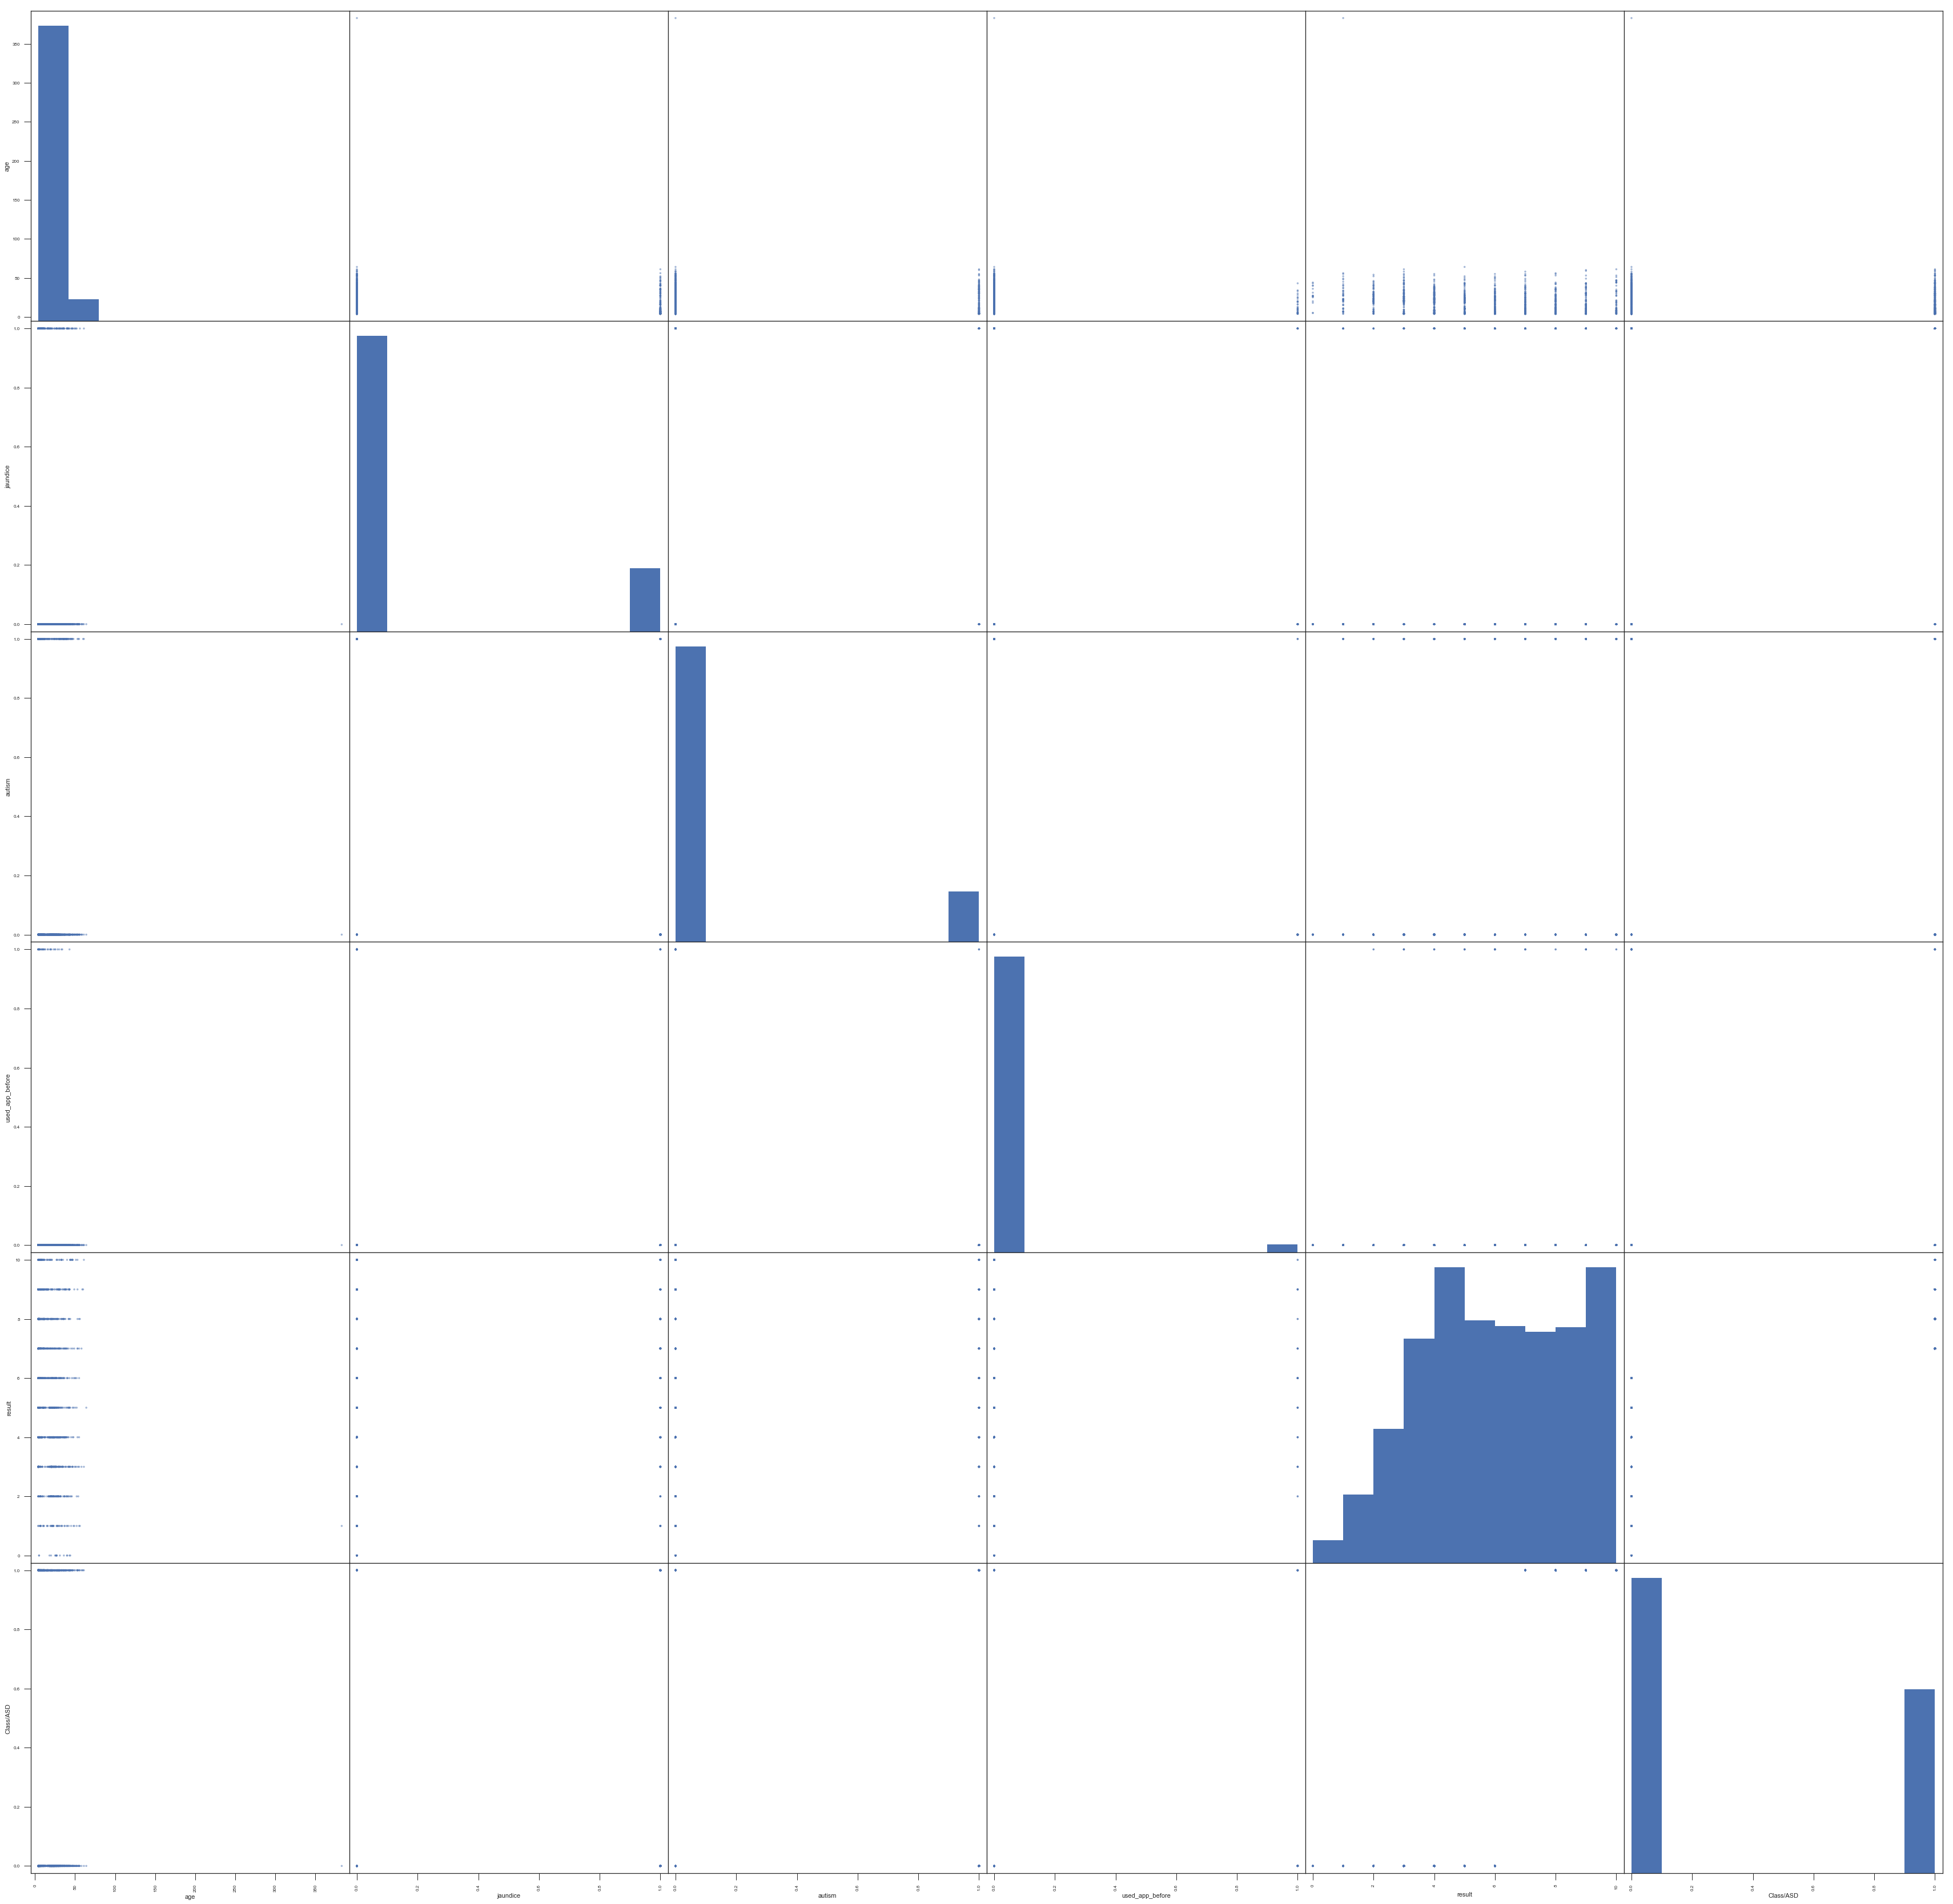

In [15]:
from pandas.plotting import scatter_matrix 
plot = scatter_matrix(df, figsize=(60, 60))

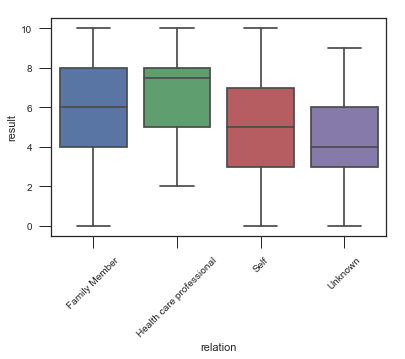

In [16]:
sb.boxplot(x='relation',y='result',data=df)
plt.xticks(rotation=45)
plt.show()

In [17]:
## Creating a dict file to covert the gender from string to int

gender = {'m': 1,'f': 0}
df.gender = [gender[item] for item in df.gender]

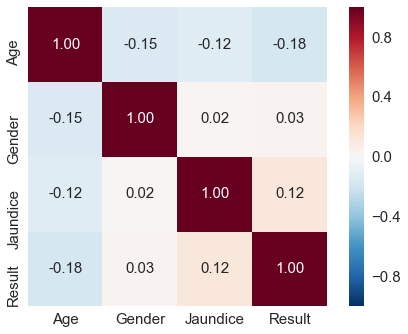

In [18]:
## Create a heatmap to explore the correlation cofficient among age, geneder, and jaudice, and ASD result

cols = ['Age', 'Gender', 'Jaundice', 'Result']
cm = np.corrcoef([df.age, df.gender, df.jaundice, df.result])
sb.set(font_scale=1.5)
hm = sb.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

# plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

# Exploratory Finding:

# Rework the data format for Machine Learning

In [19]:
df = df.drop(['result','age'],axis=1)

In [20]:
binary_df = df_get_uniform_dummies(df)
binary_df = binary_df.iloc[:,10:]
binary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 291
Data columns (total 20 columns):
jaundice                        1392 non-null int64
autism                          1392 non-null int64
used_app_before                 1392 non-null int64
Class/ASD                       1392 non-null int64
gen_1                           1392 non-null int64
eth_Black                       1392 non-null int64
eth_Hispanic                    1392 non-null int64
eth_Latino                      1392 non-null int64
eth_Middle_Eastern              1392 non-null int64
eth_Others                      1392 non-null int64
eth_Pasifika                    1392 non-null int64
eth_South_Asian                 1392 non-null int64
eth_Turkish                     1392 non-null int64
eth_Unknown                     1392 non-null int64
eth_White-European              1392 non-null int64
age_18 and older                1392 non-null int64
age_4-11 years                  1392 non-null int64
rel_Health

In [21]:
binary_df.head()

,jaundice,autism,used_app_before,Class/ASD,gen_1,eth_Black,eth_Hispanic,eth_Latino,eth_Middle_Eastern,eth_Others,eth_Pasifika,eth_South_Asian,eth_Turkish,eth_Unknown,eth_White-European,age_18 and older,age_4-11 years,rel_Health care professional,rel_Self,rel_Unknown
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
4,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


# Compare Machine Learning Models for ASD Prediction

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import (auc, roc_curve, roc_auc_score,
                             accuracy_score, precision_score,
                             recall_score, f1_score, )
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, confusion_matrix

/Users/yenshenglin/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

##np.set_printoptions(suppress=True)

/Users/yenshenglin/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Bernoulli Naive Bayes Classifier (good for binary features)

In [24]:
bern = BernoulliNB()

In [25]:
#feature_columns = binary_df.drop(['Class/ASD'],axis=1).columns
features_df = binary_df.drop(['Class/ASD'],axis=1)
feature_names = features_df.columns
features = features_df.as_matrix()
target = binary_df.loc[:,['Class/ASD']].values.reshape(len(binary_df),)

In [26]:
feature_names

Index(['jaundice', 'autism', 'used_app_before', 'gen_1', 'eth_Black',
       'eth_Hispanic', 'eth_Latino', 'eth_Middle_Eastern', 'eth_Others',
       'eth_Pasifika', 'eth_South_Asian', 'eth_Turkish', 'eth_Unknown',
       'eth_White-European', 'age_18 and older', 'age_4-11 years',
       'rel_Health care professional', 'rel_Self', 'rel_Unknown'],
      dtype='object')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features,target,random_state=12)

In [28]:
bern.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [29]:
bern_y_pred = bern.predict(X_test)
bern_y_pred_proba = bern.predict_proba(X_test)
#print(len(bern_y_pred[bern_y_pred == y_test])/len(y_test))

In [30]:
precision_score(bern_y_pred,y_test)

0.4307692307692308

In [31]:
accuracy_score(bern_y_pred,y_test)

0.6522988505747126

In [32]:
bern_log_loss = log_loss(bern_y_pred_proba[:,1],y_test)
bern_fp, bern_tp, bern_thresholds = roc_curve(y_test,bern_y_pred_proba[:,1])
bern_AUC = round(roc_auc_score(y_test,bern_y_pred_proba[:,1]),2)

# Logistic Regression

In [33]:
logreg = LogisticRegression(C=.1)

In [34]:
logreg.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
y_logreg_pred = logreg.predict(X_test)

In [36]:
precision_score(y_logreg_pred,y_test)

0.3769230769230769

In [37]:
accuracy_score(y_logreg_pred,y_test)

0.6436781609195402

In [38]:
y_logreg_pred_proba = logreg.predict_proba(X_test)

In [39]:
logreg_log_loss = log_loss(y_logreg_pred_proba[:,1],y_test)
log_fp, log_tp, log_thresholds = roc_curve(y_test,y_logreg_pred_proba[:,1])
log_AUC = round(roc_auc_score(y_test,y_logreg_pred_proba[0:,1]),2)

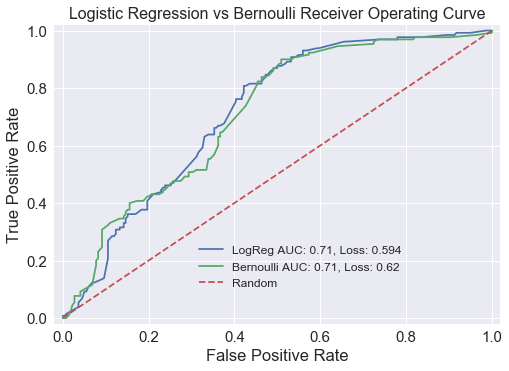

In [40]:
ax = plt.plot(log_fp,log_tp,label="LogReg AUC: {}, Loss: {}".format(log_AUC,round(logreg_log_loss,3)))
ax = plt.plot(bern_fp,bern_tp,label="Bernoulli AUC: {}, Loss: {}".format(bern_AUC,round(bern_log_loss,3)))
ax = plt.plot([0,1],[0,1],linestyle='--',label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0.3, 0.3),loc=0,fontsize=12)
plt.title('Logistic Regression vs Bernoulli Receiver Operating Curve',fontsize=16)
plt.margins(0.02)
plt.show()

In [41]:
roc_auc_score(y_test,y_logreg_pred_proba[0:,1])

0.7149964714184898

# K-Nearest Neighbors Classifier

In [42]:
neighbors = np.arange(1,10)

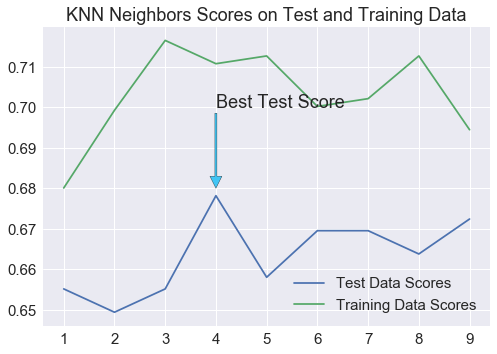

In [43]:
test_scores = np.empty(len(neighbors))
train_scores = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    test_scores[i] = knn.score(X_test,y_test)
    train_scores[i] = knn.score(X_train,y_train)
    
plt.plot(neighbors,test_scores,label='Test Data Scores')
plt.plot(neighbors,train_scores,label='Training Data Scores')
plt.title('KNN Neighbors Scores on Test and Training Data')
plt.annotate('Best Test Score',xy=(4,.68),xytext=(4,.70),arrowprops={'facecolor':'#42c5f4','width':2})
plt.legend(loc=0)
plt.show()

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)

In [45]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
knn_y_pred = knn.predict(X_test)

In [47]:
knn.score(X_train,y_train)

0.7126436781609196

In [48]:
knn_pred_proba = knn.predict_proba(X_test)
knn_fp, knn_tp, knn_thresholds = roc_curve(y_test,knn_pred_proba[:,1])
knn_AUC = round(roc_auc_score(y_test,knn_pred_proba[:,1]),2)

In [49]:
knn.score(X_test,y_test)

0.6580459770114943

In [50]:
knn_log_loss = log_loss(knn_pred_proba[:,1],y_test)

# Random Forest Classifier

In [51]:
rf = RandomForestClassifier(max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0,random_state=0, n_estimators=10, n_jobs=1)

In [52]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [53]:
rf_y_pred = rf.predict(X_test)
rf_y_pred_proba = rf.predict_proba(X_test)

In [54]:
rf.score(X_train,y_train)

0.7471264367816092

In [55]:
rf.score(X_test,y_test)

0.6637931034482759

In [56]:
rf_log_loss = log_loss(rf_y_pred_proba[:,1],y_test)
rf_fp,rf_tp, rf_thresholds = roc_curve(y_test,rf_y_pred_proba[:,1])
rf_AUC = round(roc_auc_score(y_test,rf_y_pred_proba[0:,1]),2)

# Decision Tree Classifier

In [57]:
tree = DecisionTreeClassifier(min_samples_leaf=1)

In [58]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
tree_y_pred = tree.predict(X_test)
tree_y_pred_proba = tree.predict_proba(X_test)

In [60]:
tree.score(X_train,y_train)

0.7710727969348659

In [61]:
tree.score(X_test,y_test)

0.6609195402298851

In [62]:
tree_log_loss = log_loss(tree_y_pred_proba[:,1],y_test)
tree_fp,tree_tp, tree_thresholds = roc_curve(y_test,tree_y_pred_proba[:,1])
tree_AUC = round(roc_auc_score(y_test,tree_y_pred_proba[0:,1]),2)

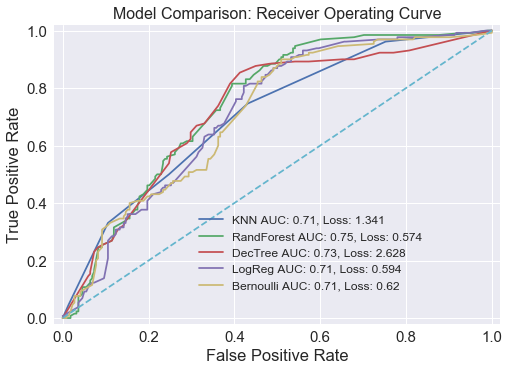

In [63]:
log_AUC = round(roc_auc_score(y_test,y_logreg_pred_proba[0:,1]),2)

ax = plt.plot(knn_fp,knn_tp,label="KNN AUC: {}, Loss: {}".format(knn_AUC,round(knn_log_loss,3)))
ax = plt.plot(rf_fp, rf_tp,label="RandForest AUC: {}, Loss: {}".format(rf_AUC,round(rf_log_loss,3)))
ax = plt.plot(tree_fp,tree_tp,label="DecTree AUC: {}, Loss: {}".format(tree_AUC,round(tree_log_loss,3)))
ax = plt.plot(log_fp,log_tp,label="LogReg AUC: {}, Loss: {}".format(log_AUC,round(logreg_log_loss,3)))
ax = plt.plot(bern_fp,bern_tp,label="Bernoulli AUC: {}, Loss: {}".format(bern_AUC,round(bern_log_loss,3)))
ax = plt.plot([0,1],[0,1],linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0.3, 0.4),loc=0,fontsize=12)
plt.title('Model Comparison: Receiver Operating Curve',fontsize=16)
plt.margins(0.02)
plt.show()

# From the ROC plot and AUC, Random Forest Regressor provides the most accurate model (Highest AUC with lowest loss)

# Exploring if Neural Network Model improves predictions 

In [64]:
feature_columns = features.shape[1]

target_split = to_categorical(target)

In [65]:
nnX_train, nnX_test, nny_train, nny_test = train_test_split(features,target_split,random_state=12)

In [66]:
model = Sequential()

In [67]:
model.add(Dense(100,activation='relu',input_shape=(feature_columns,)))

In [68]:
model.add(Dense(2,activation='softmax'))

In [69]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [70]:
model_training = model.fit(nnX_train,nny_train,batch_size=50,epochs=120)

Epoch 1/120
1044/1044 [==============================] - 0s 292us/step - loss: 0.6795 - acc: 0.5431
Epoch 2/120
1044/1044 [==============================] - 0s 34us/step - loss: 0.6281 - acc: 0.6293
Epoch 3/120
1044/1044 [==============================] - 0s 29us/step - loss: 0.6110 - acc: 0.6590
Epoch 4/120
1044/1044 [==============================] - 0s 30us/step - loss: 0.6011 - acc: 0.6609
Epoch 5/120
1044/1044 [==============================] - 0s 32us/step - loss: 0.5940 - acc: 0.6734
Epoch 6/120
1044/1044 [==============================] - 0s 33us/step - loss: 0.5889 - acc: 0.6772
Epoch 7/120
1044/1044 [==============================] - 0s 34us/step - loss: 0.5833 - acc: 0.6782
Epoch 8/120
1044/1044 [==============================] - 0s 39us/step - loss: 0.5802 - acc: 0.6839
Epoch 9/120
1044/1044 [==============================] - 0s 27us/step - loss: 0.5757 - acc: 0.6858
Epoch 10/120
1044/1044 [==============================] - 0s 27us/step - loss: 0.5728 - acc: 0.6925
Epoch 11

1044/1044 [==============================] - 0s 33us/step - loss: 0.4984 - acc: 0.7433
Epoch 84/120
1044/1044 [==============================] - 0s 28us/step - loss: 0.4987 - acc: 0.7500
Epoch 85/120
1044/1044 [==============================] - 0s 29us/step - loss: 0.4979 - acc: 0.7414
Epoch 86/120
1044/1044 [==============================] - 0s 35us/step - loss: 0.4972 - acc: 0.7395
Epoch 87/120
1044/1044 [==============================] - 0s 32us/step - loss: 0.4974 - acc: 0.7423
Epoch 88/120
1044/1044 [==============================] - 0s 31us/step - loss: 0.4967 - acc: 0.7490
Epoch 89/120
1044/1044 [==============================] - 0s 33us/step - loss: 0.4966 - acc: 0.7490
Epoch 90/120
1044/1044 [==============================] - 0s 27us/step - loss: 0.4951 - acc: 0.7548
Epoch 91/120
1044/1044 [==============================] - 0s 29us/step - loss: 0.4952 - acc: 0.7471
Epoch 92/120
1044/1044 [==============================] - 0s 33us/step - loss: 0.4948 - acc: 0.7443
Epoch 93/120


In [71]:
nn_predict_proba = model.predict_proba(nnX_test)
nn_predict_proba

array([[7.64302492e-01, 2.35697523e-01],
       [4.79983032e-01, 5.20017028e-01],
       [6.17738008e-01, 3.82261992e-01],
       [8.62240016e-01, 1.37760028e-01],
       [5.06240606e-01, 4.93759423e-01],
       [6.30303144e-01, 3.69696856e-01],
       [1.45241171e-01, 8.54758799e-01],
       [6.49854422e-01, 3.50145578e-01],
       [3.52916569e-01, 6.47083402e-01],
       [7.75392711e-01, 2.24607259e-01],
       [6.41845703e-01, 3.58154327e-01],
       [4.79983032e-01, 5.20017028e-01],
       [6.49854422e-01, 3.50145578e-01],
       [7.14400649e-01, 2.85599351e-01],
       [3.45370382e-01, 6.54629588e-01],
       [9.52630401e-01, 4.73695509e-02],
       [6.35129750e-01, 3.64870220e-01],
       [4.79983032e-01, 5.20017028e-01],
       [3.53219002e-01, 6.46780968e-01],
       [4.02573228e-01, 5.97426772e-01],
       [8.94846439e-01, 1.05153613e-01],
       [4.95781511e-01, 5.04218459e-01],
       [6.30303144e-01, 3.69696856e-01],
       [9.28305209e-01, 7.16947913e-02],
       [3.084562

In [72]:
model.evaluate(nnX_test,nny_test,batch_size=50)

348/348 [==============================] - 0s 99us/step


[0.6058736583967318, 0.6925287483067348]

In [73]:
nn_log_loss = log_loss(nn_predict_proba[:,1],nny_test[:,1])
nn_fpr, nn_tpr, nn_thresh = roc_curve(nny_test[:,1],nn_predict_proba[:,1])
nn_AUC = round(roc_auc_score(nny_test[:,1],nn_predict_proba[:,1]),2)

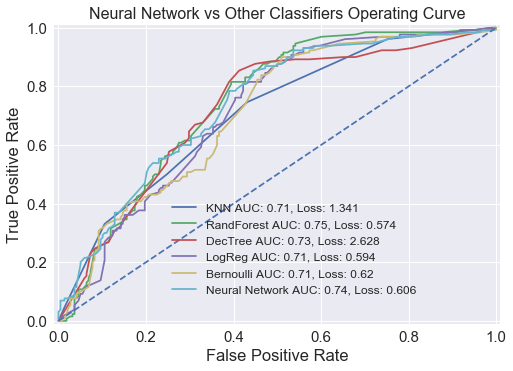

In [74]:
ax = plt.plot(knn_fp,knn_tp,label="KNN AUC: {}, Loss: {}".format(knn_AUC,round(knn_log_loss,3)))
ax = plt.plot(rf_fp, rf_tp,label="RandForest AUC: {}, Loss: {}".format(rf_AUC,round(rf_log_loss,3)))
ax = plt.plot(tree_fp,tree_tp,label="DecTree AUC: {}, Loss: {}".format(tree_AUC,round(tree_log_loss,3)))
ax = plt.plot(log_fp,log_tp,label="LogReg AUC: {}, Loss: {}".format(log_AUC,round(logreg_log_loss,3)))
ax = plt.plot(bern_fp,bern_tp,label="Bernoulli AUC: {}, Loss: {}".format(bern_AUC,round(bern_log_loss,3)))
ax = plt.plot(nn_fpr,nn_tpr,label="Neural Network AUC: {}, Loss: {}".format(nn_AUC,round(nn_log_loss,3)))
ax = plt.plot([0,1],[0,1],linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0.24, 0.25),loc=6,fontsize=12)
plt.title('Neural Network vs Other Classifiers Operating Curve',fontsize=16)
plt.margins(0.01)
plt.show()


# Check the Epoch history of Neural Network model

In [75]:
nn_history = pd.DataFrame(model_training.history)

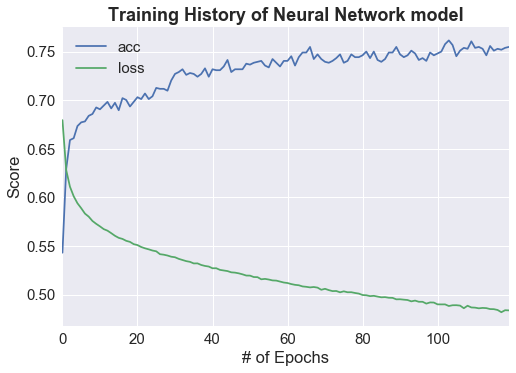

In [76]:
nn_history.plot()
plt.xlabel('# of Epochs')
plt.ylabel('Score')
plt.title('Training History of Neural Network model',fontweight='bold')
plt.show()

# Saving the Random Forest model and Predictions DataFrame

In [77]:
from sklearn.externals import joblib

In [78]:
joblib.dump(rf,'autism_screening_RF_regression_model.pkl')

['autism_screening_RF_regression_model.pkl']

In [79]:
model_loaded = joblib.load('autism_screening_RF_regression_model.pkl')

In [80]:
(rf_y_pred_proba).all() == (model_loaded.predict_proba(X_test)).all()

True

In [81]:
predictions_df = pd.DataFrame(data=X_test,columns=feature_names)

In [82]:
target_df = pd.DataFrame({'Predicted Probability':rf_y_pred_proba[:,1],
                          'Predicted Outcome':rf_y_pred})

In [83]:
target_df['Risk Level'] = pd.cut(target_df['Predicted Probability'],[0,.25,.5,.75,1],right=False,labels=['Very Unlikely','Unlikely','Likely','Very Likely'])

In [84]:
predictions_df = pd.concat([predictions_df,target_df],axis=1)

In [85]:
predictions_df.head()

,jaundice,autism,used_app_before,gen_1,eth_Black,eth_Hispanic,eth_Latino,eth_Middle_Eastern,eth_Others,eth_Pasifika,...,eth_Unknown,eth_White-European,age_18 and older,age_4-11 years,rel_Health care professional,rel_Self,rel_Unknown,Predicted Outcome,Predicted Probability,Risk Level
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.302116,Unlikely
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0.387430,Unlikely
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0.295865,Unlikely
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0.200256,Very Unlikely
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0.480813,Unlikely


In [86]:
predictions_df.to_csv('ASD_screening_predictions.csv')

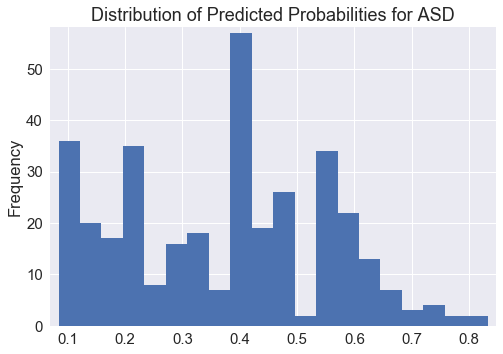

In [87]:
predictions_df['Predicted Probability'].plot(kind='hist',bins=20,title='Distribution of Predicted Probabilities for ASD')
plt.margins(0.02)
plt.show()